<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S2_C4_RDG_Marketing_target_Income_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Implementing RGD

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas

## Activity 1: Import Necessary Libraries

In [5]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')

#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl']

In [7]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

## Activity 2: Load and Explore the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


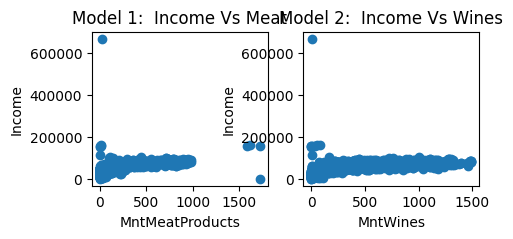

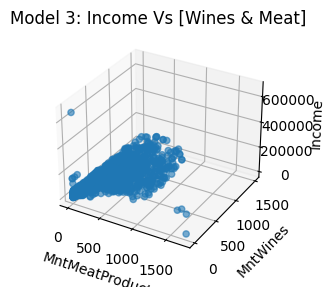

In [9]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('Model 1:  Income Vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')


plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2:  Income Vs Wines')
plt.xlabel('MntWines')
plt.ylabel('Income')

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MntMeatProducts'],df['MntWines'],df['Income'], alpha = 0.6)
ax.set_xlabel('MntMeatProducts')
ax.set_ylabel('MntWines')
ax.set_zlabel('Income')
ax.set_title('Model 3: Income Vs [Wines & Meat]')
plt.show()

## Activity 3: Preprocess Data

In [10]:
# --- >  Eliminar datos átipicos de Income
#---------------------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [11]:
# --- >  Eliminar datos átipicos de MntMeatProducts
#---------------------------------------
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [12]:
# --- >  Eliminar datos átipicos de MntWines
#---------------------------------------
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

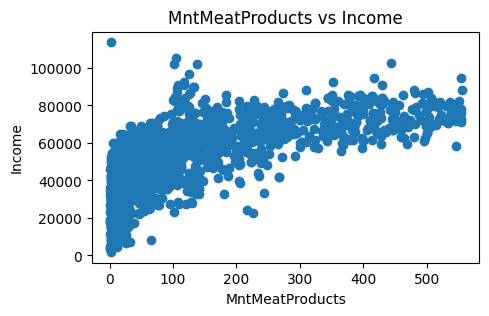

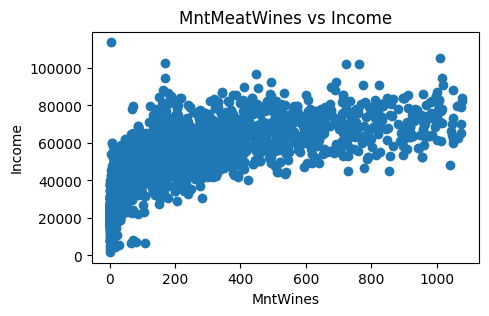

In [13]:

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

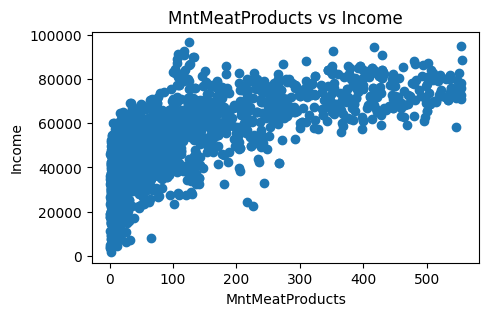

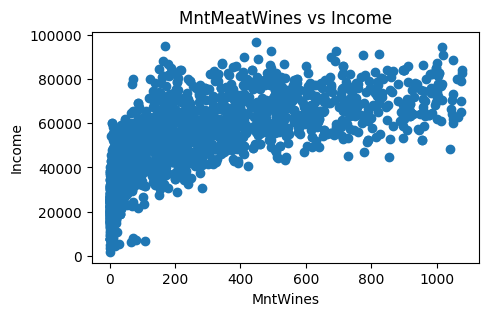

In [14]:
df = df[df['Income']< 100000]

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# Activity 4: Implement a Una iteración RGD Regresión Gradiente Decendente

In [15]:
# Inicializar parámetros
theta = 80
intercept = 5000

In [16]:
# y = b + mX
# h = b + Theta(X1)
# h = theta_0 + theta_1(X1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

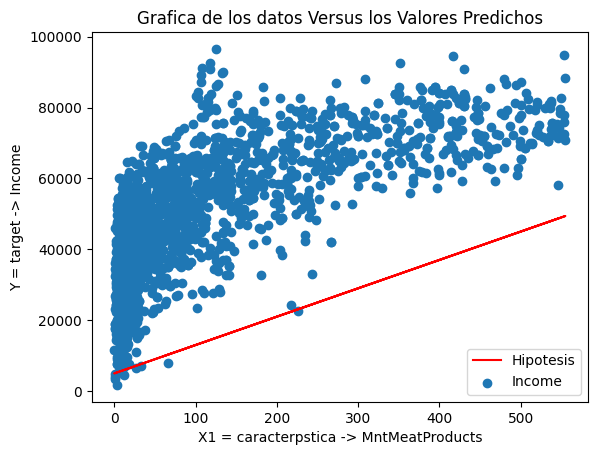

In [17]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = caracterpstica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [18]:
# Calcule el error cuadratico medio MSE = cost = lost
# MSE = ((h-y)^2)/m
h = df['Hipotesis']
Y = df['Income']
X1 = df['MntMeatProducts']
m = len(df)
MSE = np.mean((h-Y)**2)
MSE = print( f'El error cuadratico medio es: {round(MSE,2)}')

El error cuadratico medio es: 1365248812.66


In [19]:
# Actualice los parámetros
theta_0 = intercept
theta_1 = theta
alpha = 0.0001 # Este valor entre 0 y 1

In [20]:
theta_0

5000

In [21]:
# Actualización de theta_0
theta_0 = theta_0 - alpha * (2/m) * np.sum((h-Y))
theta_0

5006.875806278481

In [22]:
theta_1

80

In [23]:
# Actualización de theta_1
theta_1 = theta_1 - alpha * (2/m) * np.dot(X1.T,(h-Y))
theta_1

931.7064279493671

In [24]:
# Visualice la nueva recta

In [25]:
H_new = theta_0 + theta_1 * X1

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

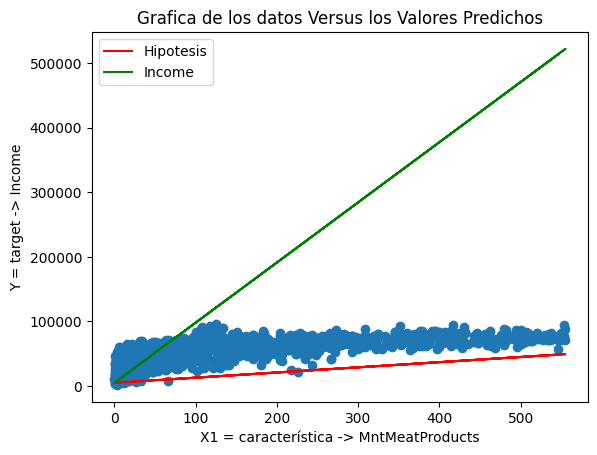

In [26]:

plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.plot(df['MntMeatProducts'],H_new,color='green')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [27]:
# Calcule la bondad de ajuste
SSE = np.sum((H_new-Y)**2)
Y_mean = np.mean(Y)
SST = np.sum((Y-Y_mean)**2)
R2 = 1 - (SSE/SST)
R2

-46.011471492207995

In [28]:
theta = np.random.randn(2,1)

In [29]:
theta

array([[-0.7570099 ],
       [-0.01477275]])

# Actividad 5. Implement a Gradient Descent Regression function

In [30]:
from statsmodels.tools.tools import add_constant

In [31]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.0001
n_iteraciones = 100

In [32]:
def cost_function(H,Y):
  #MSE = np.mean((h-Y)**2)
  # np.mean : calcula media aritmética de los elemntos
  cost = np.mean((H-Y)**2)
  return cost

In [33]:
# Inicializar parámetros
def my_RGD(Y,X1,alpha,n_iteraciones):
  theta = np.random.randn(2,1)


   # H = theta 0*(1) + theta 1*X1
  # la constante es necesaria para la multiplicacion del vector de  parametros con la matriz de las caracteristicas
  X1 = add_constant(X1)
  # Convirtiendo a un array vector columna (m,1)
  Y = np.reshape(Y,(-1,1))
  cost_history = np.zeros(n_iteraciones)

  for i in range(n_iteraciones):
    # H = theta 0*(1) + theta 1*X1
    H = np.dot(X1,theta)
    #  llamanfo la funcion que calcula el costo
    cost_function(H,Y)

    # Guarda el costo en la iteracion i_ésima
    cost_history[i] = cost_function(H,Y)

    # Actualizacion de parametro
    theta = theta - alpha * (1/m) * np.dot(X1.T,(H-Y))

  return theta,cost_history



## Activity 5.1: Define Cost Function

Parametrso finales
[[  2.39769587]
 [213.52665557]]
Costo mínimo
1013247032.792374
{min_cost}


Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

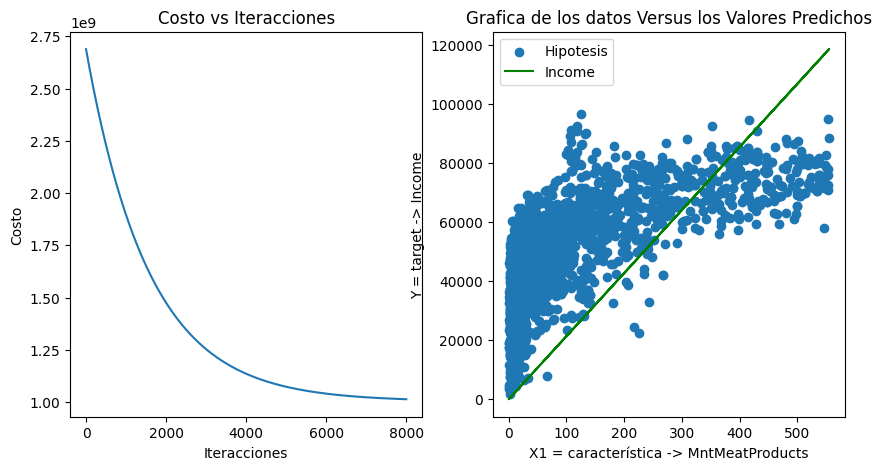

In [38]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.00000001
n_iteraciones = 8000

theta_final, cost_hys =my_RGD(Y,X1,alpha,n_iteraciones)

# predicciones con los parametros
H_final = theta_final[0] + theta_final[1] * X1
print('Parametrso finales')
print(theta_final)
print('Costo mínimo')
print(cost_hys[-1])
min_cost = np.min(cost_hys)
print('{min_cost}')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cost_hys)
plt.title('Costo vs Iteracciones')
plt.xlabel('Iteracciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.plot(df['MntMeatProducts'],H_final, color='green')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')


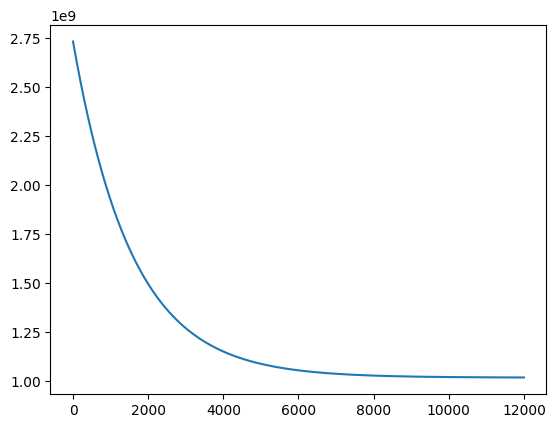

In [ ]:
plt.plot(cost_hys)

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

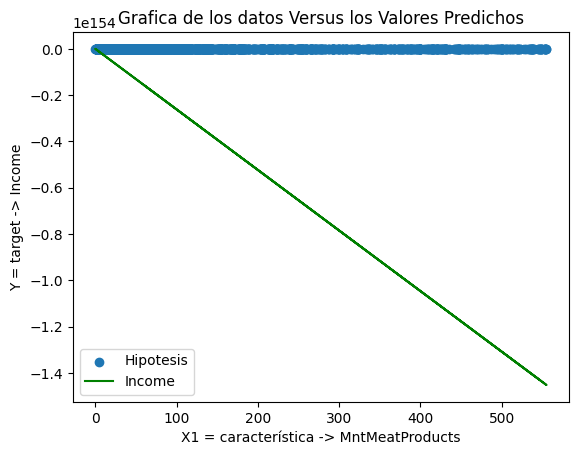

In [ ]:
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.plot(df['MntMeatProducts'],H_final, color='green')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

# Activity 6: Initialize Parameters and Run

Parametrso finales
[[-3.81224436e-02]
 [ 1.07763309e+02]]
Costo mínimo
914879805.1576023
{min_cost}


Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

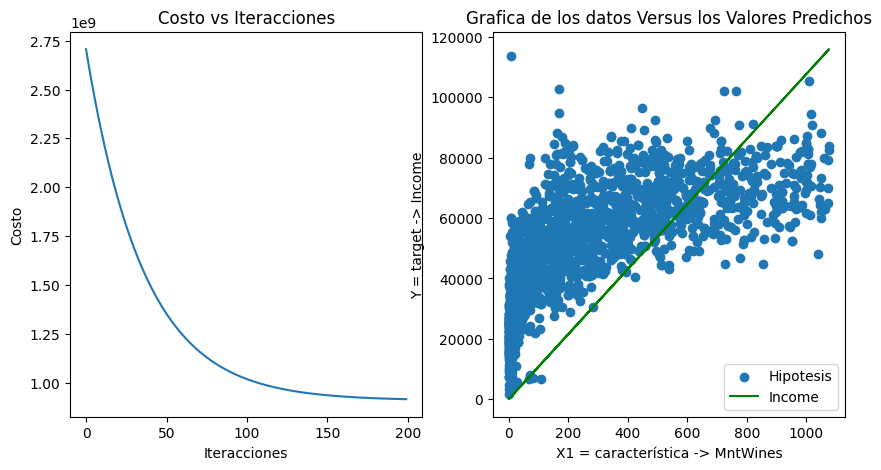

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntWines']
# Hiperparámetro
alpha = 0.0000001
n_iteraciones = 200

theta_final, cost_hys =my_RGD(Y,X1,alpha,n_iteraciones)

# predicciones con los parametros
H_final = theta_final[0] + theta_final[1] * X1
print('Parametrso finales')
print(theta_final)
print('Costo mínimo')
print(cost_hys[-1])
min_cost = np.min(cost_hys)
print('{min_cost}')




plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(cost_hys)
plt.title('Costo vs Iteracciones')
plt.xlabel('Iteracciones')
plt.ylabel('Costo')

plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.plot(df['MntWines'],H_final, color='green')
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntWines')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

# Activity 7: Plot Cost Function over Iterations

# Activity 8: Evaluate Model Performance